In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The variable *SeniorCitizen* has a int64 dtype, but, in reality, is a one hot encoded categorical variable. 
- The variable *TotalCharges* has a object dtype, but it should be a float.  

In [5]:
df["TotalCharges"].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

It seems like, for some observations, the variable has ' ' values. This is making pandas read this column as an object instead of a float. I'll see the distribution of the non missing values, in order to properly impute those missing values.

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


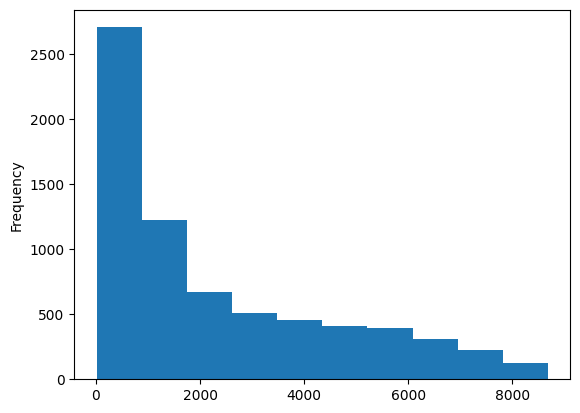

In [6]:
filled_total_charges = (
    df
    .loc[df["TotalCharges"] != ' ', "TotalCharges"]
    .astype("float")
)

print(filled_total_charges.describe())
filled_total_charges.plot(kind="hist")

plt.show()

The histogram and the statistics calculated from the distribution of the *TotalCharges* variable indicates that it's skewed to the right. In this case, it's better to impute the values with the median.  

In [7]:
df_filled = df.copy()

df_filled["TotalCharges"] = (
    df_filled["TotalCharges"]
    .replace(' ', filled_total_charges.median().astype(str))
    .astype("float")
)

print(df_filled["TotalCharges"].dtype)

float64


In [8]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Qualitative variables:
    1. customerID: customer identification; this variable will not enter in the analysis.
    2. gender
    3. SeniorCitizen
    4. Partner
    5. Dependents
    6. PhoneService
    7. MultipleLines
    8. InternetService
    9. OnlineSecurity
    10. OnlineBackup
    11. DeviceProtection
    12. TechSupport
    13. StreamingTV
    14. StreamingMovies
    15. Contract
    16. PaperlessBilling
    17. PaymentMethod
    18. Churn: wheter the customer has churned or not; the target.
- Quantitative variables:
    1. tenure
    2. MonthlyCharges
    3. TotalCharges

(PUT IN HERE A DESCRIPTION FOR ALL THOSE VARIABLES)

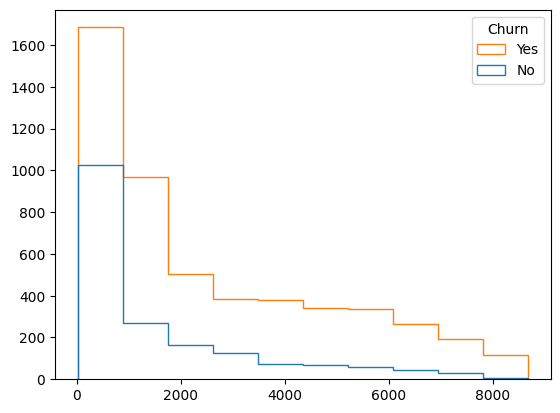

In [54]:
total_charges_by_churn = [
    df_filled.loc[df_filled["Churn"] == "Yes", "TotalCharges"], 
    df_filled.loc[df_filled["Churn"] == "No", "TotalCharges"]
]

fig, ax = plt.subplots()
ax.hist(x=total_charges_by_churn, histtype="step", label=df_filled["Churn"].unique())
ax.legend(title="Churn")
#ax.hist(x=total_charges_by_churn[1], histtype="step")

plt.show()

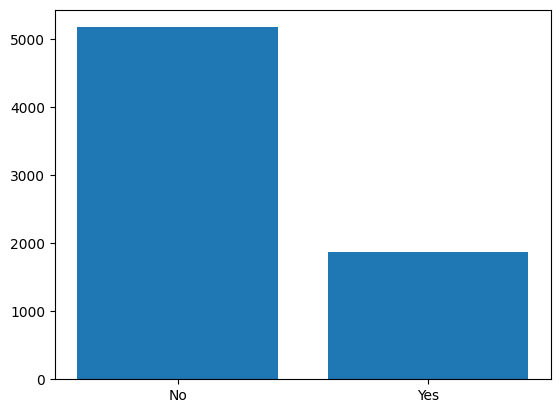

In [20]:
churn_counts = df_filled["Churn"].value_counts()

fig, ax = plt.subplots()

ax.bar(x=churn_counts.index, height=churn_counts)

plt.show()

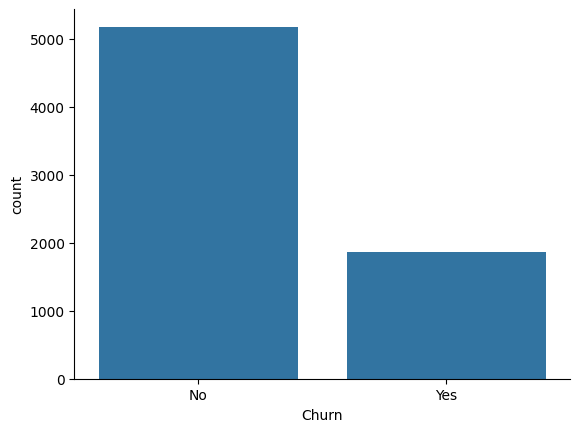

In [16]:
#churn = df_filled["Churn"].replace({"Yes": 1, "No": 0})
sns.countplot(data=df_filled, x="Churn")

sns.despine()
plt.show()

In [55]:
pd.get_dummies(data=df_filled, columns=["Churn"], drop_first=True, dtype=int)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
